In [1]:
## 1.1 Load Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read Taxi Data
import pandas as pd
df_trips = pd.read_parquet('/content/drive/MyDrive/Datasets/MIS-502/yellow_tripdata_2025-01.parquet')


In [4]:
df_trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [5]:
df_trips.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.475226e+06,3475226,3475226,2.935077e+06,3.475226e+06,2.935077e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,3.475226e+06,2.935077e+06,2.935077e+06
mean,1.785428e+00,2025-01-17 11:02:55.910964,2025-01-17 11:17:56.997901,1.297859e+00,5.855126e+00,2.482535e+00,1.651916e+02,1.641252e+02,1.036623e+00,1.708180e+01,1.317737e+00,4.780991e-01,2.959813e+00,4.493081e-01,9.547946e-01,2.561129e+01,2.225237e+00,1.239111e-01
min,1.000000e+00,2024-12-31 20:47:55,2024-12-18 07:52:40,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2025-01-10 07:59:01,2025-01-10 08:15:29.500000,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.520000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2025-01-17 15:41:33,2025-01-17 15:59:34,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.211000e+01,0.000000e+00,5.000000e-01,2.450000e+00,0.000000e+00,1.000000e+00,1.995000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2025-01-24 19:34:06,2025-01-24 19:48:31,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.950000e+01,2.500000e+00,5.000000e-01,3.930000e+00,0.000000e+00,1.000000e+00,2.778000e+01,2.500000e+00,0.000000e+00
max,7.000000e+00,2025-02-01 00:00:44,2025-02-01 23:44:11,9.000000e+00,2.764236e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,8.633721e+05,1.500000e+01,1.050000e+01,4.000000e+02,1.709400e+02,1.000000e+00,8.633804e+05,2.500000e+00,6.750000e+00
std,4.263282e-01,NaN,NaN,7.507503e-01,5.646016e+02,1.163277e+01,6.452948e+01,6.940169e+01,7.013334e-01,4.634729e+02,1.861509e+00,1.374623e-01,3.779681e+00,2.002582e+00,2.781938e-01,4.636585e+02,9.039932e-01,4.725090e-01


In [6]:
df_trips.shape

(3475226, 19)

In [7]:
df_trips.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
df_trips['tpep_pickup_datetime'].dt.year.value_counts()

,count
tpep_pickup_datetime,
2025,3475205
2024,21


In [9]:
#Enrich the Taxi data with designated Boroughs/Zones based on the Taxi Zone Lookup Data
taxi_zone_lookup  = pd.read_csv('/content/drive/MyDrive/Datasets/MIS-502/taxi_zone_lookup.csv')
taxi_zone_lookup.head()


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [10]:
df_trips = df_trips.merge(
    taxi_zone_lookup[['LocationID', 'Borough', 'Zone']].rename(columns={
        'LocationID': 'PULocationID',
        'Borough': 'PUBorough',
        'Zone': 'PUZone'
    }),
    on='PULocationID',
    how='left'
)

In [11]:
df_trips = df_trips.merge(
    taxi_zone_lookup[['LocationID', 'Borough', 'Zone']].rename(columns={
        'LocationID': 'DOLocationID',
        'Borough': 'DOBorough',
        'Zone': 'DOZone'
    }),
    on='DOLocationID',
    how='left'
)

In [12]:
df_trips.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'PUBorough',
       'PUZone', 'DOBorough', 'DOZone'],
      dtype='object')

In [13]:
# pip install ydata-profiling


In [14]:
# from ydata_profiling import ProfileReport

# # Assuming your taxi trip data is in a DataFrame called taxi_df
# profile = ProfileReport(df_trips, title="NYC Taxi Trip Data Profiling Report", explorative=True)

# # Display in Jupyter Notebook
# profile.to_notebook_iframe()

# # Or export to HTML
# profile.to_file("taxi_data_profile.html")

In [15]:
pickup_boroughs = df_trips['PUBorough'].value_counts().sort_values(ascending=False)
print(pickup_boroughs)

PUBorough
Manhattan        3089275
Queens            294986
Brooklyn           66070
Bronx              14741
Unknown             8141
EWR                  377
Staten Island        256
Name: count, dtype: int64


In [16]:
dropoff_boroughs = df_trips['DOBorough'].value_counts().sort_values(ascending=False)
print(dropoff_boroughs)

DOBorough
Manhattan        3116979
Queens            162896
Brooklyn          140987
Bronx              22728
Unknown            11976
EWR                 6873
Staten Island        701
Name: count, dtype: int64


In [17]:
#Top Pickup-Dropoff Pairs
df_trips.groupby(['PUBorough', 'DOBorough']).size().sort_values(ascending=False).head(10)

PUBorough  DOBorough
Manhattan  Manhattan    2933898
Queens     Manhattan     153958
           Queens         82208
Manhattan  Queens         72093
           Brooklyn       56882
Queens     Brooklyn       43896
Brooklyn   Brooklyn       38777
           Manhattan      18746
Manhattan  Bronx           9309
           Unknown         7338
dtype: int64

In [18]:
pickup_counts = df_trips['PUBorough'].value_counts()
dropoff_counts = df_trips['DOBorough'].value_counts()

net_flow = (pickup_counts - dropoff_counts).sort_values(ascending=False)
print(net_flow)
#Positive = borough losing taxis (more pickups than dropoffs),
#Negative = borough gaining taxis (more dropoffs than pickups).

PUBorough
Queens           132090
Staten Island      -445
Unknown           -3835
EWR               -6496
Bronx             -7987
Manhattan        -27704
Brooklyn         -74917
Name: count, dtype: int64


In [19]:
avg_distance_pickup = df_trips.groupby('PUBorough')['trip_distance'].mean().sort_values(ascending=False)
print(avg_distance_pickup)


PUBorough
Bronx            65.913405
Brooklyn         24.807042
Queens           13.360874
Staten Island     8.305703
Manhattan         4.443919
Unknown           3.202056
EWR               0.896286
Name: trip_distance, dtype: float64


**Data Visualizations - EDA**

<ipython-input-20-aa27dacc57fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_boroughs.index, y=pickup_boroughs.values, palette='viridis')


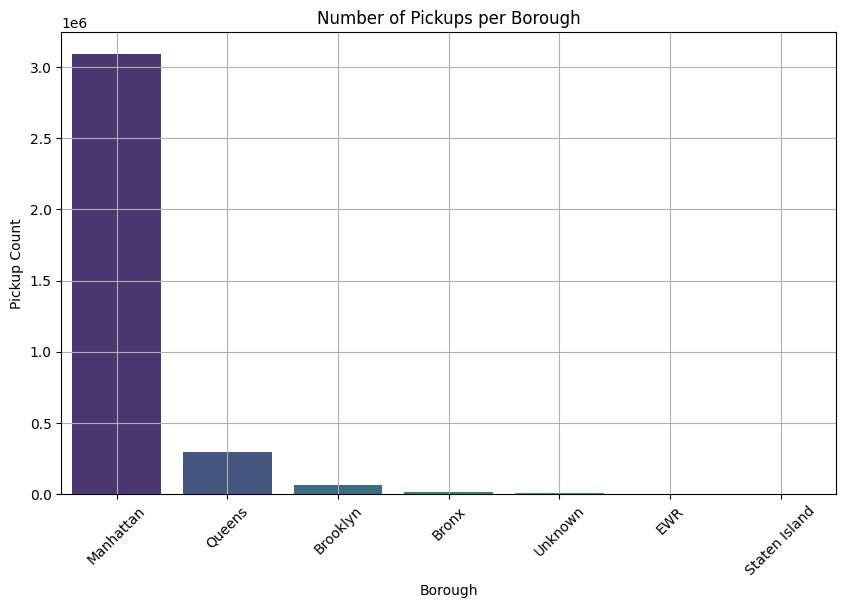

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=pickup_boroughs.index, y=pickup_boroughs.values, palette='viridis')
plt.title('Number of Pickups per Borough')
plt.ylabel('Pickup Count')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-21-57de4a725d24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropoff_boroughs.index, y=dropoff_boroughs.values, palette='magma')


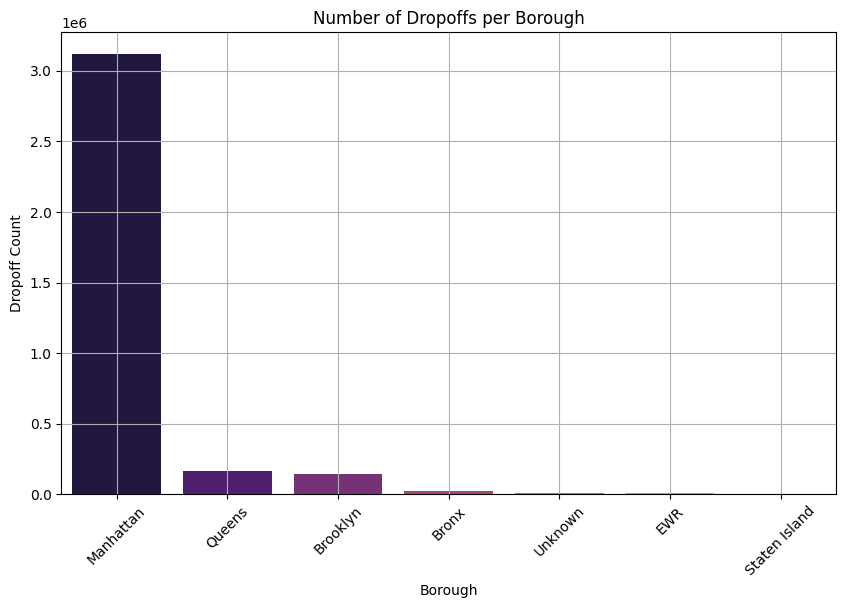

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=dropoff_boroughs.index, y=dropoff_boroughs.values, palette='magma')
plt.title('Number of Dropoffs per Borough')
plt.ylabel('Dropoff Count')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-22-a7c118a76112>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=net_flow.index, y=net_flow.values, palette='cubehelix')


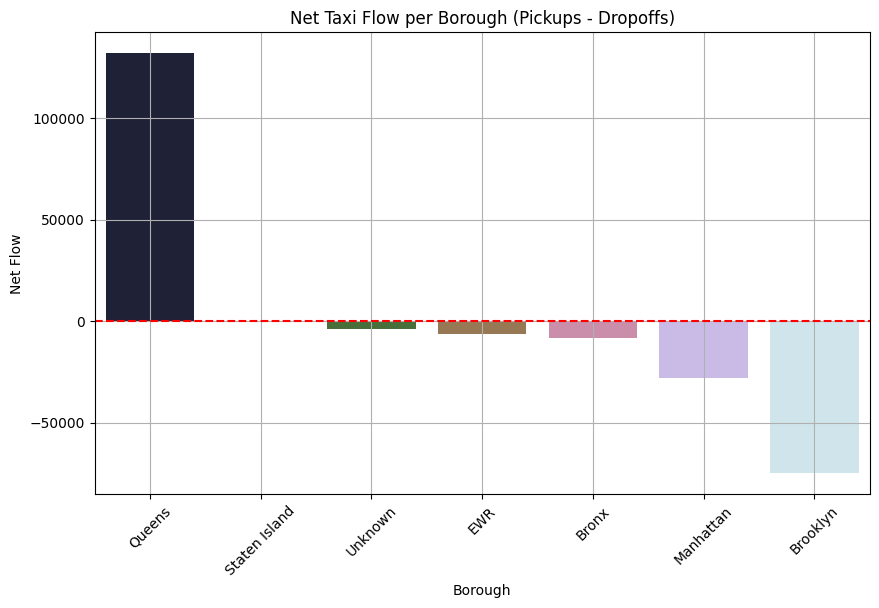

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=net_flow.index, y=net_flow.values, palette='cubehelix')
plt.title('Net Taxi Flow per Borough (Pickups - Dropoffs)')
plt.ylabel('Net Flow')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


In [23]:

df_trips['pickup_datetime_rounded'] = pd.to_datetime(df_trips['tpep_pickup_datetime']).dt.floor('H')
df_trips['pickup_date'] = pd.to_datetime(df_trips['pickup_datetime_rounded']).dt.date
df_trips['pickup_hour'] = pd.to_datetime(df_trips['pickup_datetime_rounded']).dt.hour
df_trips['pickup_weekday'] = pd.to_datetime(df_trips['pickup_datetime_rounded']).dt.dayofweek
df_trips['pickup_month'] = pd.to_datetime(df_trips['pickup_datetime_rounded']).dt.month

<ipython-input-23-79be053a80fd>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_trips['pickup_datetime_rounded'] = pd.to_datetime(df_trips['tpep_pickup_datetime']).dt.floor('H')


In [24]:
#Trip Duration
df_trips['trip_duration_min'] = (
    pd.to_datetime(df_trips['tpep_dropoff_datetime']) - pd.to_datetime(df_trips['tpep_pickup_datetime'])
).dt.total_seconds() / 60

In [25]:
import pandas as pd
#Read Supplement Data
traffic_data = pd.read_csv('/content/drive/MyDrive/Datasets/MIS-502/Automated_Traffic_Volume_Counts_20250421.csv')
traffic_data.shape

(1712605, 14)

In [26]:
traffic_data.head()

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,32970,Queens,2021,4,30,2,0,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
1,32970,Queens,2021,4,30,2,15,1,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
2,11342,Brooklyn,2012,12,18,8,15,33,20063,POINT (985746.5 167127.4),61 ST,15 AV,16 AV,WB
3,32970,Queens,2021,4,30,2,30,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB
4,32970,Queens,2021,4,30,2,45,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB


In [27]:
traffic_df = traffic_data[(traffic_data['Yr'] >= 2020) & (traffic_data['Yr'] <= 2024)]

traffic_df.reset_index(drop=True, inplace=True)

In [28]:
traffic_df['volume_count_datetime'] = pd.to_datetime(dict(
    year=traffic_df['Yr'],
    month=traffic_df['M'],
    day=traffic_df['D'],
    hour=traffic_df['HH'],
    minute=traffic_df['MM']
))

<ipython-input-28-29f536d87ee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df['volume_count_datetime'] = pd.to_datetime(dict(


In [29]:
traffic_features = traffic_df.groupby(['Boro', 'D', 'HH']).agg(
    vol_mean=('Vol', 'mean'),
    vol_std=('Vol', 'std'),
    vol_max=('Vol', 'max'),
    vol_median=('Vol', 'median')
).reset_index()

In [30]:
traffic_features.head()

,Boro,D,HH,vol_mean,vol_std,vol_max,vol_median
0,Bronx,1,0,20.232143,12.346499,54,18.0
1,Bronx,1,1,13.803571,7.770386,33,13.5
2,Bronx,1,2,10.178571,5.874775,24,10.0
3,Bronx,1,3,8.553571,5.232485,23,8.0
4,Bronx,1,4,10.892857,7.379772,33,8.5


In [31]:
df_trips['pickup_month'].value_counts()

,count
pickup_month,
1,3475204
12,21
2,1


In [32]:
#Merge the dataframes
df_trips_merged = df_trips.merge(
    traffic_features[['Boro','D', 'HH', 'vol_mean', 'vol_max', 'vol_median']],
    left_on=['PUBorough', 'pickup_weekday', 'pickup_hour'],
    right_on=['Boro', 'D', 'HH'],
    how='left'
)


In [33]:
# Drop redundant columns
df_trips_merged.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'PUBorough',
       'PUZone', 'DOBorough', 'DOZone', 'pickup_datetime_rounded',
       'pickup_date', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'trip_duration_min', 'Boro', 'D', 'HH', 'vol_mean', 'vol_max',
       'vol_median'],
      dtype='object')

In [34]:
df_trips_merged.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,pickup_weekday,pickup_month,trip_duration_min,Boro,D,HH,vol_mean,vol_max,vol_median
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,...,0,2,1,8.350000,Manhattan,2.0,0.0,123.821429,609.0,69.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,...,0,2,1,2.550000,Manhattan,2.0,0.0,123.821429,609.0,69.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,...,0,2,1,1.950000,Manhattan,2.0,0.0,123.821429,609.0,69.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,...,0,2,1,5.566667,Manhattan,2.0,0.0,123.821429,609.0,69.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,...,0,2,1,3.533333,Manhattan,2.0,0.0,123.821429,609.0,69.0


### Data Visualizations - Adding Geospatial Features


In [35]:
import pathlib
import geopandas as gpd

gdf_zones = gpd.read_file('/content/drive/MyDrive/Datasets/MIS-502/taxi_zones.shp')

# gdf_zones typically has LocationID (PULocationID), Zone, Borough, and geometry (polygon)
gdf_zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [36]:
gdf_zones['centroid'] = gdf_zones.geometry.centroid

# Create a lookup DataFrame
zone_centroids = gdf_zones[['LocationID', 'centroid']].copy()

# Separate centroid into latitude and longitude
zone_centroids['pickup_longitude'] = zone_centroids['centroid'].x
zone_centroids['pickup_latitude'] = zone_centroids['centroid'].y

zone_centroids = zone_centroids.drop(columns=['centroid'])
zone_centroids

,LocationID,pickup_longitude,pickup_latitude
0,1,9.359968e+05,191376.749531
1,2,1.031086e+06,164018.754403
2,3,1.026453e+06,254265.478659
3,4,9.906340e+05,202959.782391
4,5,9.318714e+05,140681.351376
...,...,...,...
258,259,1.025106e+06,266453.414552
259,260,1.010212e+06,210434.891894
260,261,9.806395e+05,197635.173702
261,262,9.990647e+05,221974.400788


In [37]:
print(df_trips.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59              1.0   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13              1.0   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01              1.0   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01              3.0   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.60         1.0                  N           229           237   
1           0.50         1.0                  N           236           237   
2           0.60         1.0                  N           141           141   
3           0.52         1.0                  N           244           244   
4           0.66         1.0                  N           244           116   

   payment_type  ...  PUBorough                         PUZone  DOBorough 

In [38]:
# # Create Geometry Points for Pickups
from shapely import wkt

# Parse WKT strings into geometries
traffic_df['geometry'] = traffic_df['WktGeom'].apply(wkt.loads)

# Convert to GeoDataFrame
gdf_traffic = gpd.GeoDataFrame(traffic_df, geometry='geometry', crs='EPSG:2263')  # NYC state plane projection

# Convert taxi pickups to match CRS
gdf_trips = gdf_zones.to_crs(gdf_traffic.crs)


<ipython-input-38-6471e39e9c82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df['geometry'] = traffic_df['WktGeom'].apply(wkt.loads)


In [39]:
gdf_traffic.head()

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction,volume_count_datetime,geometry
0,32970,Queens,2021,4,30,2,0,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB,2021-04-30 02:00:00,POINT (997407.1 208620.926)
1,32970,Queens,2021,4,30,2,15,1,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB,2021-04-30 02:15:00,POINT (997407.1 208620.926)
2,32970,Queens,2021,4,30,2,30,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB,2021-04-30 02:30:00,POINT (997407.1 208620.926)
3,32970,Queens,2021,4,30,2,45,0,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB,2021-04-30 02:45:00,POINT (997407.1 208620.926)
4,32970,Queens,2021,4,30,3,0,1,149701,POINT (997407.0998491726 208620.92612708386),PULASKI BRIDGE,Newtown Creek Shoreline,Dead end,NB,2021-04-30 03:00:00,POINT (997407.1 208620.926)


In [40]:
gdf_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,centroid
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",POINT (935996.821 191376.75)
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",POINT (1031085.719 164018.754)
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",POINT (1026452.617 254265.479)
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",POINT (990633.981 202959.782)
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",POINT (931871.37 140681.351)


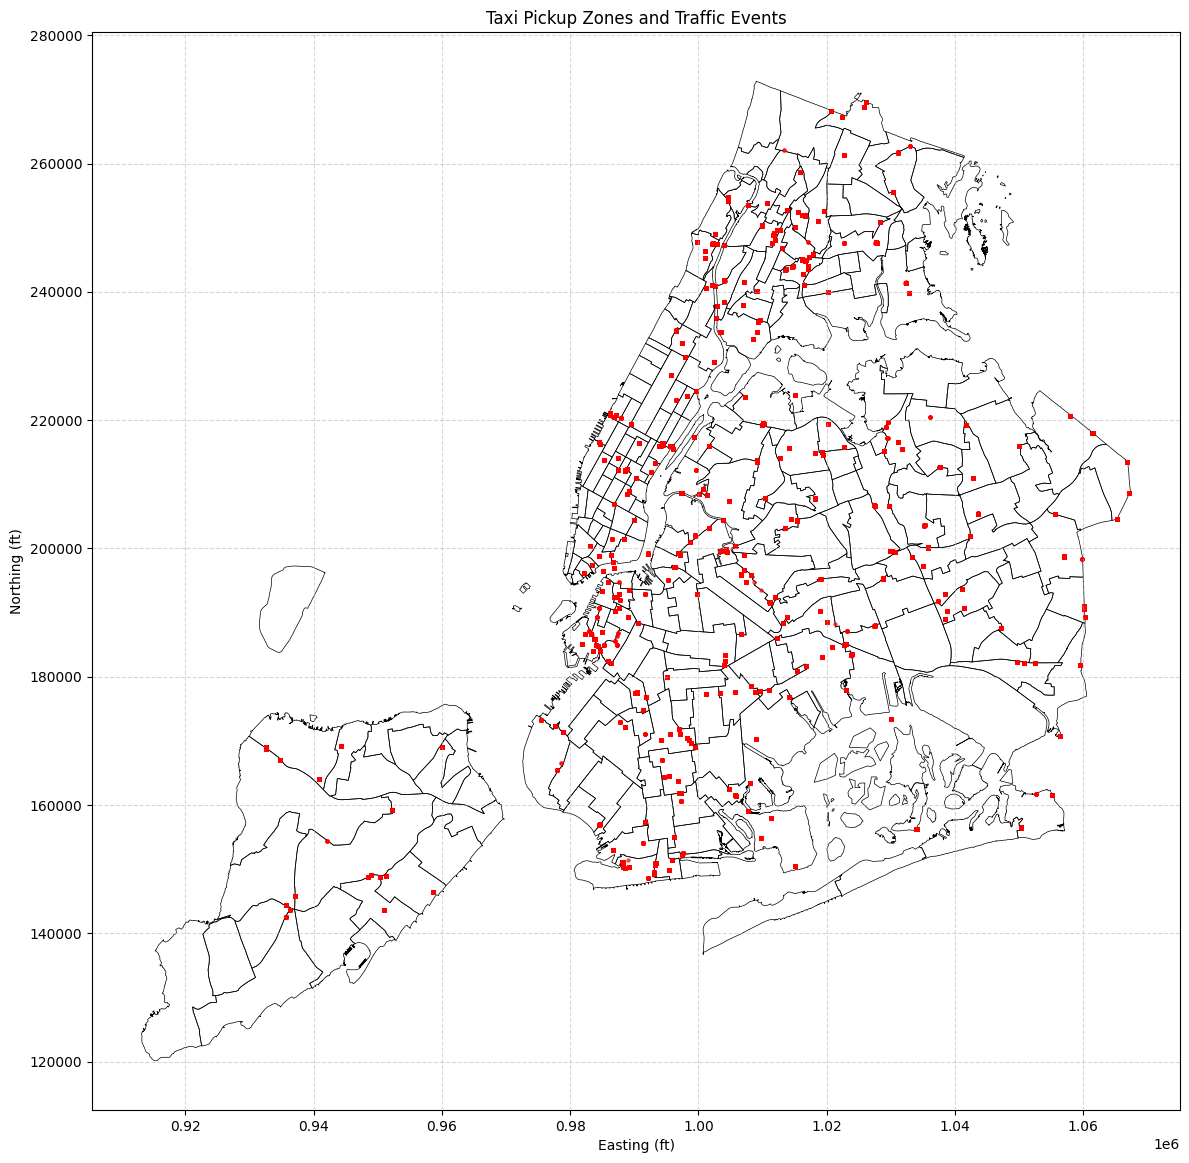

In [41]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot taxi pickup zones (gdf_trips) as polygons
gdf_trips.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Plot traffic points (gdf_traffic) as dots
gdf_traffic.plot(ax=ax, color='red', markersize=5, alpha=0.6)

# Set title and labels
plt.title('Taxi Pickup Zones and Traffic Events')
plt.xlabel('Easting (ft)')
plt.ylabel('Northing (ft)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 91.1 MB/s eta 0:00:00


## **Feature Engineering for Demand Forecasting **

In [44]:
# First import mode
from scipy.stats import mode
import numpy as np

# Define custom aggregation functions
def most_common_value(x):
    if x.isnull().all():
        return np.nan
    else:
        return x.value_counts().idxmax()

# Aggregate
demand_df = (
    df_trips_merged.groupby(['PUBorough', 'PUZone', 'pickup_datetime_rounded'])
    .agg(
        pickup_count=('VendorID', 'count'),
        avg_trip_distance=('trip_distance', 'mean'),
        avg_passenger_count=('passenger_count', 'mean'),
        avg_fare_amount=('fare_amount', 'mean'),
        avg_tip_amount=('tip_amount', 'mean'),
        avg_total_amount=('total_amount', 'mean'),
        avg_tolls_amount=('tolls_amount', 'mean'),
        most_common_payment_type=('payment_type', most_common_value),
        most_common_DOBorough=('DOBorough', most_common_value),
        most_common_DOZone=('DOZone', most_common_value),
        avg_rate_code=('RatecodeID', 'mean'),
        avg_vol_mean=('vol_mean', 'mean'),
        avg_vol_max=('vol_max', 'mean'),
        avg_vol_median=('vol_median', 'mean')
    )
    .reset_index()
)


In [45]:
demand_df.head()

,PUBorough,PUZone,pickup_datetime_rounded,pickup_count,avg_trip_distance,avg_passenger_count,avg_fare_amount,avg_tip_amount,avg_total_amount,avg_tolls_amount,most_common_payment_type,most_common_DOBorough,most_common_DOZone,avg_rate_code,avg_vol_mean,avg_vol_max,avg_vol_median
0,Bronx,Allerton/Pelham Gardens,2025-01-01 01:00:00,1,1.00,NaN,21.20,0.0,22.70,0.0,0,Bronx,Co-Op City,NaN,16.923077,76.0,13.5
1,Bronx,Allerton/Pelham Gardens,2025-01-01 03:00:00,1,6.72,NaN,1.42,0.0,2.92,0.0,0,Bronx,Mount Hope,NaN,11.326923,62.0,9.0
2,Bronx,Allerton/Pelham Gardens,2025-01-01 04:00:00,1,6.07,NaN,-12.57,0.0,-11.07,0.0,0,Bronx,Longwood,NaN,12.557692,61.0,9.0
3,Bronx,Allerton/Pelham Gardens,2025-01-01 06:00:00,1,0.89,NaN,-4.11,0.0,-2.61,0.0,0,Bronx,Van Nest/Morris Park,NaN,41.500000,359.0,26.0
4,Bronx,Allerton/Pelham Gardens,2025-01-01 08:00:00,2,4.10,1.0,25.00,0.0,25.50,0.0,1,Bronx,Mott Haven/Port Morris,99.0,74.578947,609.0,51.0


In [46]:
demand_df = demand_df.sort_values(['PUBorough', 'PUZone', 'pickup_datetime_rounded'])


In [47]:
# Sort first
demand_df = demand_df.sort_values(['PUBorough', 'PUZone', 'pickup_datetime_rounded'])

# Create lag features
demand_df['lag_1h'] = demand_df.groupby(['PUBorough', 'PUZone'])['pickup_count'].shift(1)
demand_df['lag_2h'] = demand_df.groupby(['PUBorough', 'PUZone'])['pickup_count'].shift(2)
demand_df['lag_24h'] = demand_df.groupby(['PUBorough', 'PUZone'])['pickup_count'].shift(24)

# Drop rows with missing lag values
demand_df = demand_df.dropna(subset=['lag_1h', 'lag_2h', 'lag_24h'])

In [48]:
demand_df['congestion_spike'] = demand_df['avg_vol_mean'] - demand_df.groupby(['PUBorough', 'PUZone'])['avg_vol_mean'].transform('mean')


<ipython-input-48-5a299633309e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_df['congestion_spike'] = demand_df['avg_vol_mean'] - demand_df.groupby(['PUBorough', 'PUZone'])['avg_vol_mean'].transform('mean')


In [49]:
demand_df['lag_vol_mean_1h'] = demand_df.groupby(['PUBorough', 'PUZone'])['avg_vol_mean'].shift(1)


<Figure size 1400x800 with 0 Axes>

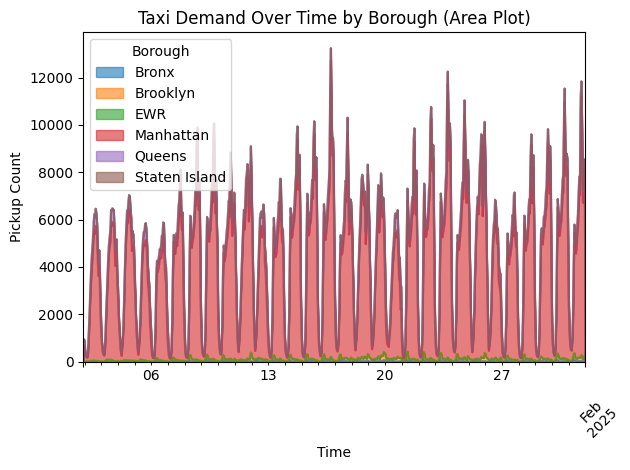

In [50]:
import matplotlib.pyplot as plt

pivot_df = demand_df.pivot_table(index='pickup_datetime_rounded', columns='PUBorough', values='pickup_count', aggfunc='sum')

plt.figure(figsize=(14, 8))
pivot_df.plot.area(alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Pickup Count')
plt.title('Taxi Demand Over Time by Borough (Area Plot)')
plt.legend(title='Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-51-13e2264afd21>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  subset = subset.set_index('pickup_datetime_rounded').rolling('6H', min_periods=1).mean().reset_index()
<ipython-input-51-13e2264afd21>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  subset = subset.set_index('pickup_datetime_rounded').rolling('6H', min_periods=1).mean().reset_index()
<ipython-input-51-13e2264afd21>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  subset = subset.set_index('pickup_datetime_rounded').rolling('6H', min_periods=1).mean().reset_index()
<ipython-input-51-13e2264afd21>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  subset = subset.set_index('pickup_datetime_rounded').rolling('6H', min_periods=1).mean().reset_index()
<ipython-input-51-13e2264afd21>:14: FutureWa

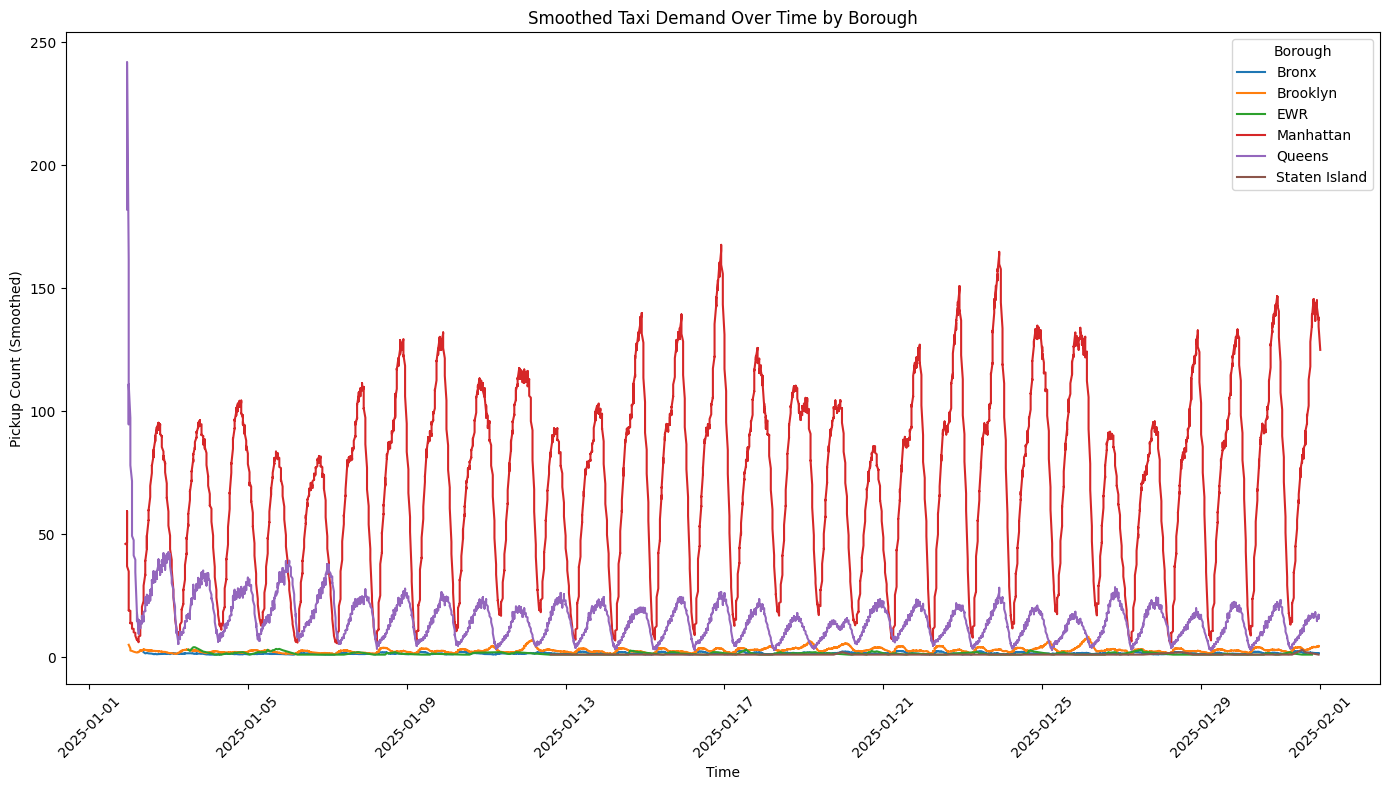

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

for boro in demand_df['PUBorough'].unique():
    subset = demand_df[demand_df['PUBorough'] == boro]
    subset = subset.sort_values('pickup_datetime_rounded')  # Sort by time

    # Keep only necessary columns and make sure pickup_count is numeric
    subset = subset[['pickup_datetime_rounded', 'pickup_count']].copy()
    subset['pickup_count'] = pd.to_numeric(subset['pickup_count'], errors='coerce')  # force non-numeric to NaN

    # Set datetime as index and apply rolling
    subset = subset.set_index('pickup_datetime_rounded').rolling('6H', min_periods=1).mean().reset_index()

    plt.plot(subset['pickup_datetime_rounded'], subset['pickup_count'], label=boro)

plt.xlabel('Time')
plt.ylabel('Pickup Count (Smoothed)')
plt.title('Smoothed Taxi Demand Over Time by Borough')
plt.legend(title='Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


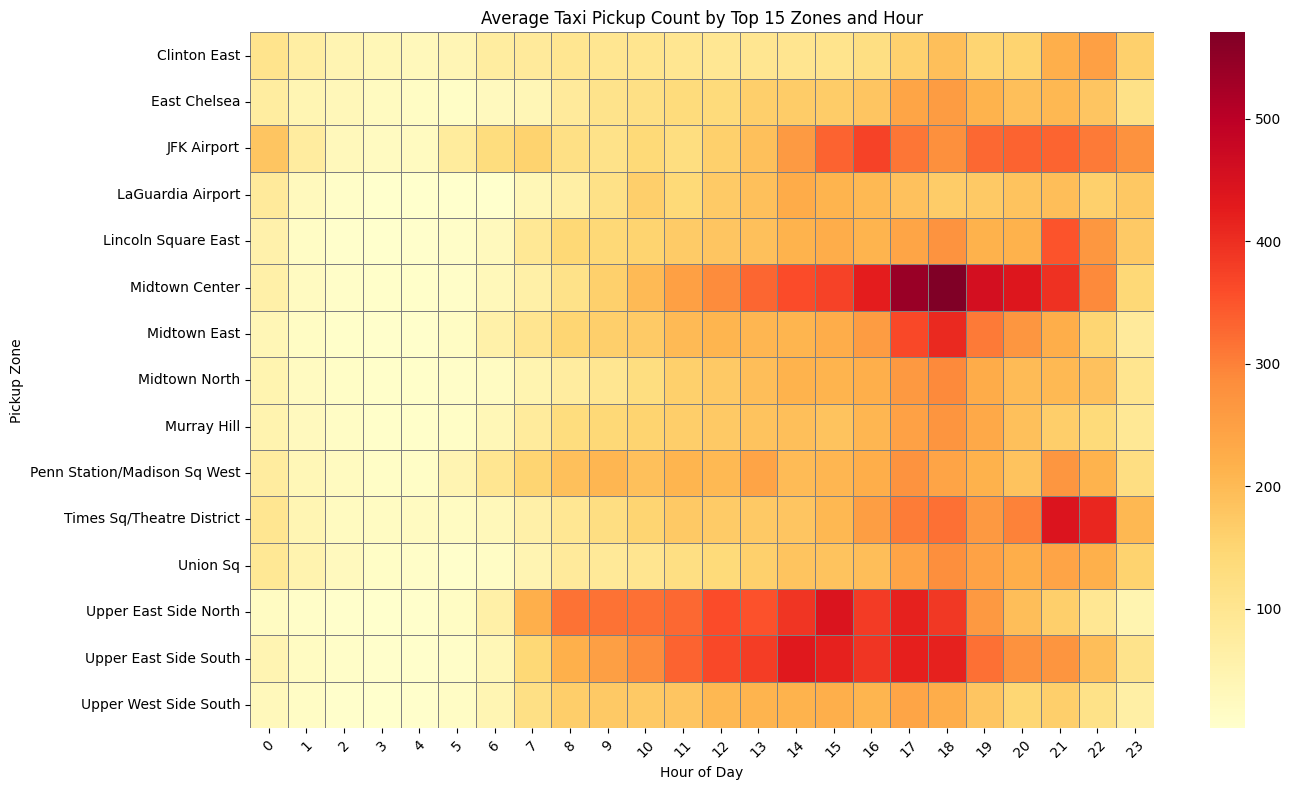

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Add pickup hour
demand_df['pickup_hour'] = pd.to_datetime(demand_df['pickup_datetime_rounded']).dt.hour

# Calculate mean pickups per zone
zone_avg = demand_df.groupby('PUZone')['pickup_count'].mean().sort_values(ascending=False)

# Pick top 15 busiest zones
top_zones = zone_avg.head(15).index

# Filter the data for only top zones
filtered_df = demand_df[demand_df['PUZone'].isin(top_zones)]

# Create pivot table
heatmap_data = filtered_df.pivot_table(index='PUZone', columns='pickup_hour', values='pickup_count', aggfunc='mean')

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray')

plt.title('Average Taxi Pickup Count by Top 15 Zones and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Zone')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


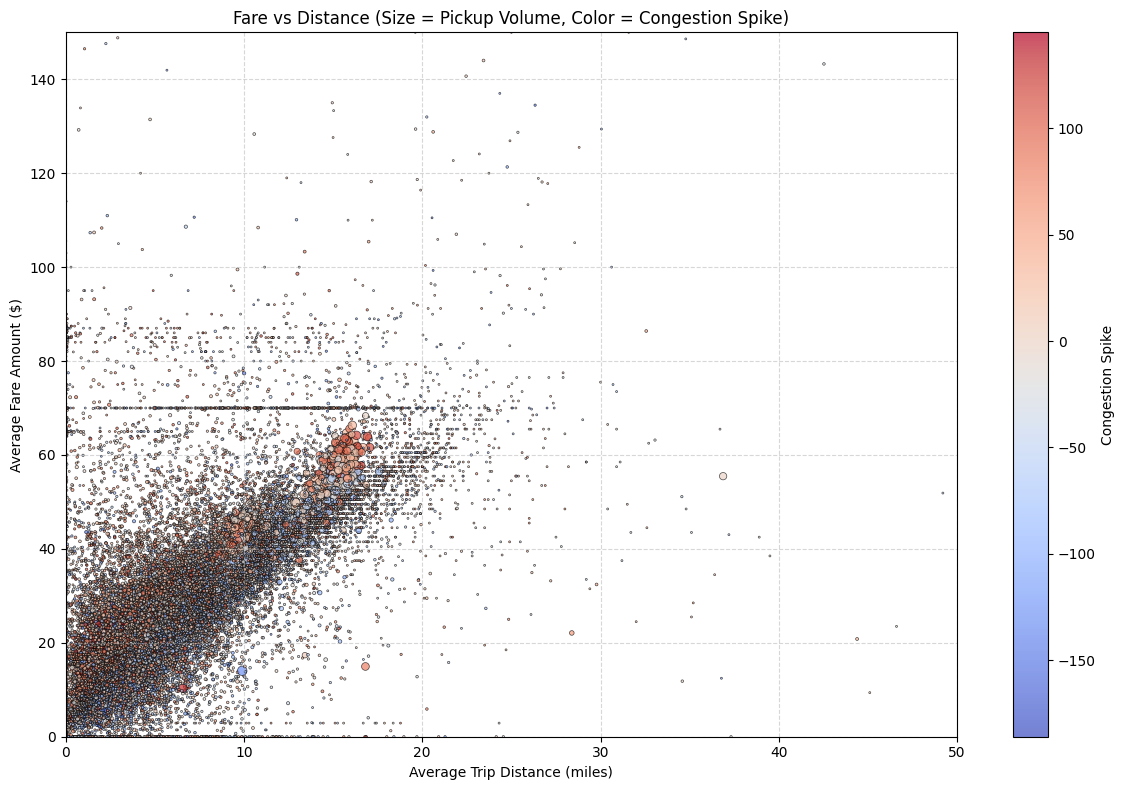

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out extreme trips
filtered_df = demand_df[demand_df['avg_trip_distance'] < 50]  # Only trips < 50 miles (you can tweak)

plt.figure(figsize=(12, 8))

# Square-root scale the pickup count for bubble size
bubble_size = np.sqrt(filtered_df['pickup_count']) * 2  # tweak multiplier for better visibility

sc = plt.scatter(
    filtered_df['avg_trip_distance'],
    filtered_df['avg_fare_amount'],
    s=bubble_size,
    c=filtered_df['congestion_spike'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5
)

plt.xlabel('Average Trip Distance (miles)')
plt.ylabel('Average Fare Amount ($)')
plt.title('Fare vs Distance (Size = Pickup Volume, Color = Congestion Spike)')
plt.colorbar(sc, label='Congestion Spike')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 50)  # limit x-axis nicely
plt.ylim(0, 150) # limit y-axis to fare range you expect
plt.tight_layout()
plt.show()



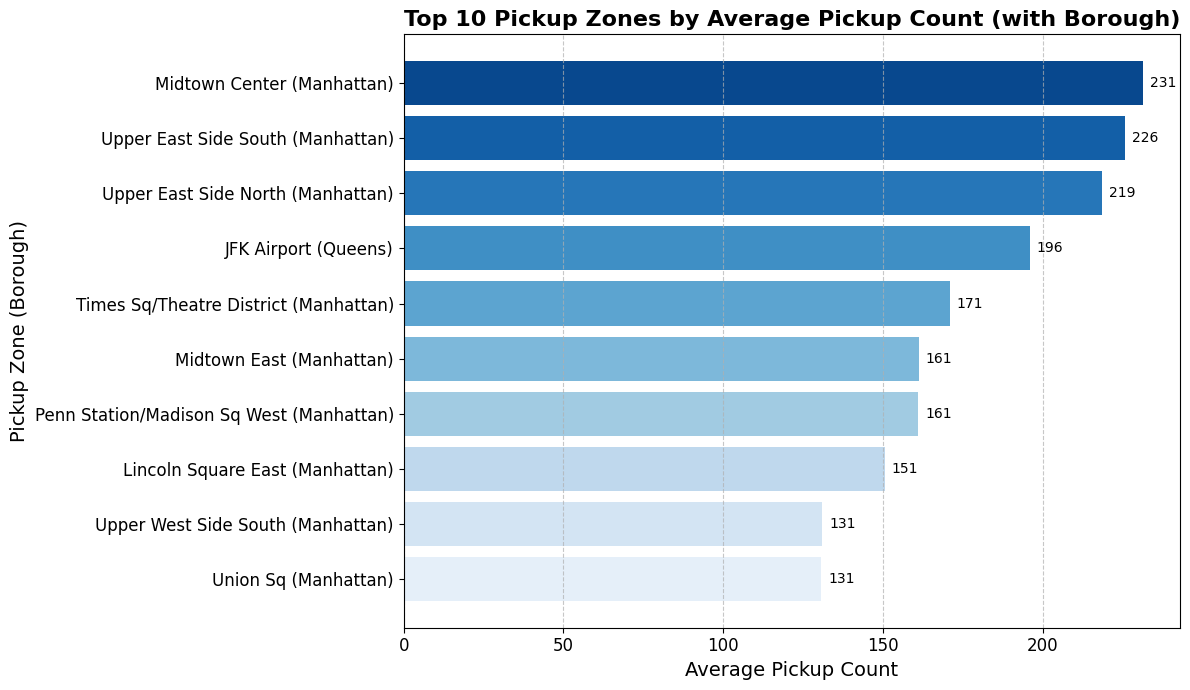

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by PUZone and get the average pickup count
zone_avg_pickup = demand_df.groupby('PUZone')['pickup_count'].mean().sort_values(ascending=False)

# Also get corresponding Borough for each Zone (taking the most frequent borough per zone)
zone_borough = demand_df.groupby('PUZone')['PUBorough'].agg(lambda x: x.mode().iloc[0])

# Combine Zone Name and Borough
zone_with_borough = zone_avg_pickup.to_frame().join(zone_borough)
zone_with_borough['Zone_Borough'] = zone_with_borough.index + ' (' + zone_with_borough['PUBorough'] + ')'

# Pick top 10
top_10 = zone_with_borough.head(10)

# Now plot
plt.figure(figsize=(12, 7))

# Color palette
colors = sns.color_palette('Blues_r', len(top_10))

bars = plt.barh(top_10['Zone_Borough'], top_10['pickup_count'], color=colors)

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.0f}', xy=(width, bar.get_y() + bar.get_height()/2),
                 xytext=(5, 0), textcoords='offset points',
                 ha='left', va='center', fontsize=10)

plt.title('Top 10 Pickup Zones by Average Pickup Count (with Borough)', fontsize=16, fontweight='bold')
plt.xlabel('Average Pickup Count', fontsize=14)
plt.ylabel('Pickup Zone (Borough)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


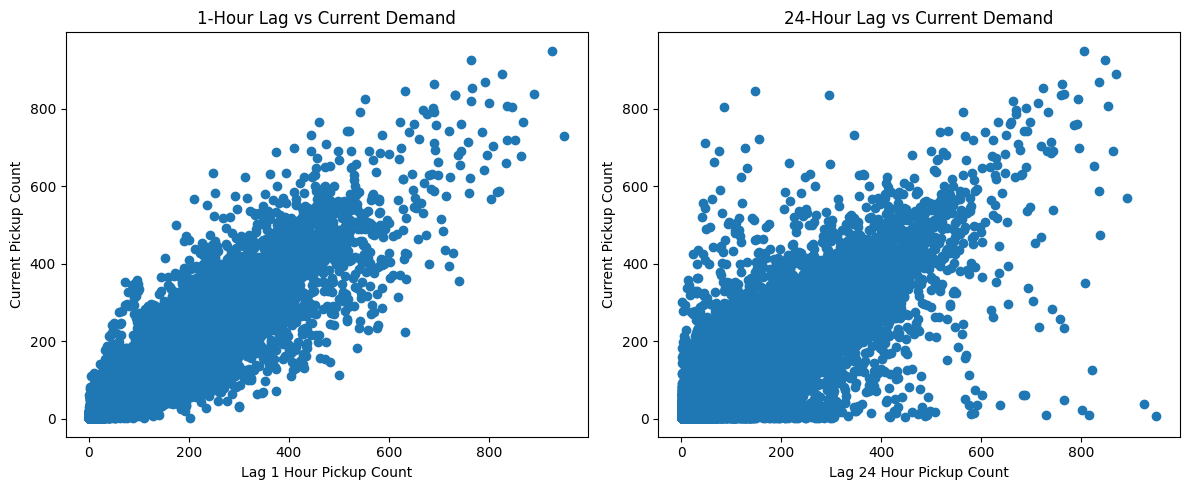

In [55]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(demand_df['lag_1h'], demand_df['pickup_count'])
plt.xlabel('Lag 1 Hour Pickup Count')
plt.ylabel('Current Pickup Count')
plt.title('1-Hour Lag vs Current Demand')

plt.subplot(1,2,2)
plt.scatter(demand_df['lag_24h'], demand_df['pickup_count'])
plt.xlabel('Lag 24 Hour Pickup Count')
plt.ylabel('Current Pickup Count')
plt.title('24-Hour Lag vs Current Demand')

plt.tight_layout()
plt.show()


Train a Random Forest Regressor Model on the demand_df

Predicting pickup_count using:

- Time features (pickup_hour, pickup_weekday)
- Trip features (avg_trip_distance, avg_passenger_count, etc.)
- Traffic features (avg_vol_mean, avg_vol_max, etc.)
- Lag features (lag_1h, lag_2h, lag_24h)

**Define Feature Columns and Target**

In [56]:
demand_df['pickup_weekday'] = pd.to_datetime(demand_df['pickup_datetime_rounded']).dt.dayofweek


In [57]:
# Features to use
features = [
    'pickup_hour', 'pickup_weekday',
    'avg_trip_distance', 'avg_passenger_count',
    'avg_fare_amount', 'avg_tip_amount', 'avg_total_amount',
    'avg_tolls_amount','avg_vol_mean', 'avg_vol_max', 'avg_vol_median',
    'lag_1h', 'lag_2h', 'lag_24h'
]

X = demand_df[features]
y = demand_df['pickup_count']


In [58]:
from sklearn.model_selection import train_test_split

# Random split (you could also do time-based split if serious forecasting)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} pickups")
print(f"RMSE: {rmse:.2f} pickups")
print(f"R² Score: {r2:.2f}")


MAE: 6.58 pickups
RMSE: 16.32 pickups
R² Score: 0.95


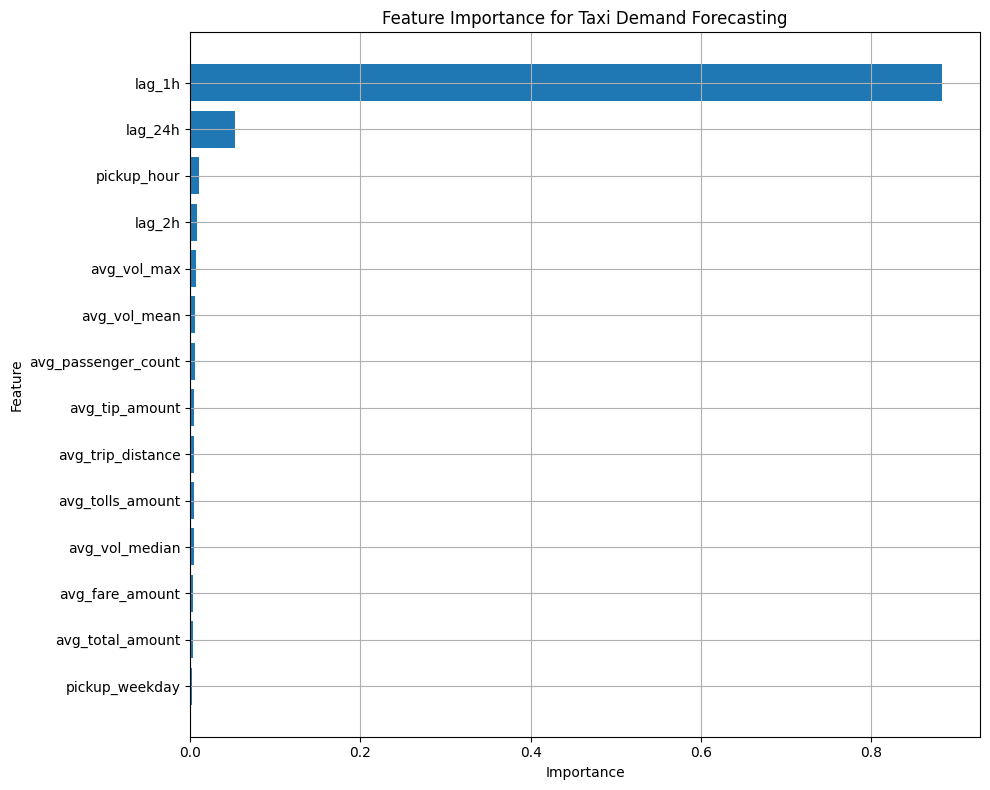

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importance = rf_model.feature_importances_

# Make a nice DataFrame
importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.title("Feature Importance for Taxi Demand Forecasting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
# No lag features
no_lag_features = [
    'pickup_hour',
    'pickup_weekday',
    'avg_vol_mean',
    'avg_vol_max',
    'avg_vol_median'
]

X_no_lag = demand_df[no_lag_features]
y_no_lag = demand_df['pickup_count']


In [63]:
X_no_lag = demand_df[no_lag_features]
y_no_lag = demand_df['pickup_count']

In [64]:
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_no_lag, y_no_lag, test_size=0.2, random_state=42
)


In [65]:
xgb_model_nolag = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model_nolag.fit(X_train_nl, y_train_nl)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred_nl = xgb_model_nolag.predict(X_test_nl)

# Evaluation
mae_nl = mean_absolute_error(y_test_nl, y_pred_nl)
rmse_nl = np.sqrt(mean_squared_error(y_test_nl, y_pred_nl))
r2_nl = r2_score(y_test_nl, y_pred_nl)

print(f"No-Lag Model Performance:")
print(f"MAE: {mae_nl:.2f}")
print(f"RMSE: {rmse_nl:.2f}")
print(f"R²: {r2_nl:.2f}")


No-Lag Model Performance:
MAE: 33.12
RMSE: 63.57
R²: 0.30


<ipython-input-67-9c94a0369178>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df_nl, palette='viridis')


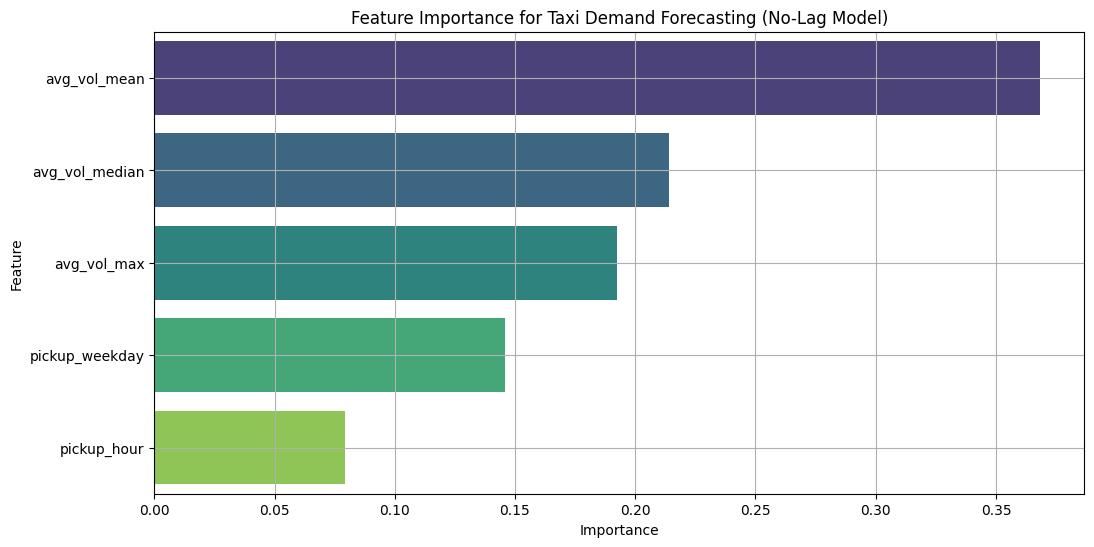

In [67]:
# Extract feature importance
importances_nl = xgb_model_nolag.feature_importances_
features_nl = X_train_nl.columns

# Create DataFrame
importances_df_nl = pd.DataFrame({
    'Feature': features_nl,
    'Importance': importances_nl
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importances_df_nl, palette='viridis')
plt.title('Feature Importance for Taxi Demand Forecasting (No-Lag Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [68]:
X = demand_df[[
    'pickup_hour',
    'pickup_weekday',
    'pickup_count',
    'avg_trip_distance',
    'avg_fare_amount',
    'avg_tip_amount',
    'avg_total_amount',
    'avg_passenger_count',
]]



In [69]:
# Define surge: volume greater than 90th percentile
surge_threshold = demand_df['avg_vol_mean'].quantile(0.9)

demand_df['is_surge'] = (demand_df['avg_vol_mean'] > surge_threshold).astype(int)

y = demand_df['is_surge']


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [71]:
from sklearn.ensemble import RandomForestClassifier

surge_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

surge_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16456
           1       0.98      0.84      0.90      1542

    accuracy                           0.98     17998
   macro avg       0.98      0.92      0.95     17998
weighted avg       0.98      0.98      0.98     17998



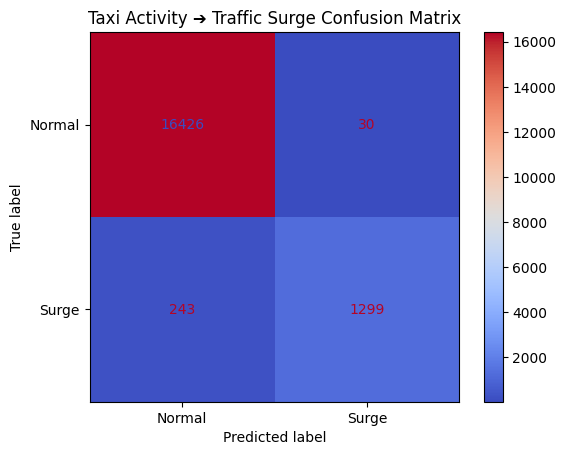

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = surge_classifier.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Surge'])
disp.plot(cmap='coolwarm')
plt.title('Taxi Activity ➔ Traffic Surge Confusion Matrix')
plt.grid(False)
plt.show()


In [73]:
zone_cluster_features = (
    demand_df.groupby('PUZone')
    .agg({
        'pickup_count': 'mean',
        'avg_trip_distance': 'mean',
        'avg_total_amount': 'mean',
        'avg_vol_mean': 'mean',
        'avg_passenger_count': 'mean'
    })
    .dropna()
)



In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
zone_scaled = scaler.fit_transform(zone_cluster_features)

In [75]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
zone_cluster_features['Cluster'] = kmeans.fit_predict(zone_scaled)

In [76]:
zone_cluster_features['Cluster'].sort_values(ascending=False)

,Cluster
PUZone,
Baisley Park,3
Forest Park/Highland Park,3
Flushing Meadows-Corona Park,3
East Elmhurst,3
Randalls Island,3
...,...
Williamsburg (South Side),0
Woodlawn/Wakefield,0
Woodhaven,0


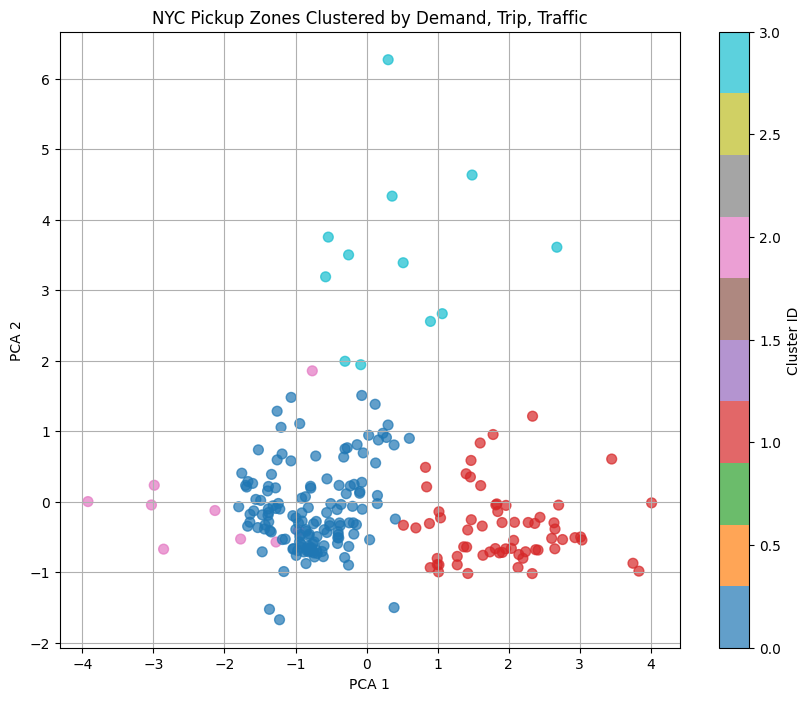

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
zone_pca = pca.fit_transform(zone_scaled)

plt.figure(figsize=(10,8))
plt.scatter(zone_pca[:,0], zone_pca[:,1], c=zone_cluster_features['Cluster'], cmap='tab10', s=50, alpha=0.7)
plt.title('NYC Pickup Zones Clustered by Demand, Trip, Traffic')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Cluster ID')
plt.show()


In [78]:
# Calculate average values inside each cluster
cluster_summary = (
    zone_cluster_features
    .groupby('Cluster')
    .mean()
)

print(cluster_summary)

         pickup_count  avg_trip_distance  avg_total_amount  avg_vol_mean  \
Cluster                                                                    
0            2.102279          12.536925         30.767293    102.354585   
1           66.397283          10.235438         23.810583    172.568166   
2            1.595542         367.292340         32.862495     90.267267   
3           29.896577           8.215093         54.303625    129.573009   

         avg_passenger_count  
Cluster                       
0                   1.101248  
1                   1.268710  
2                   1.090160  
3                   1.451670  


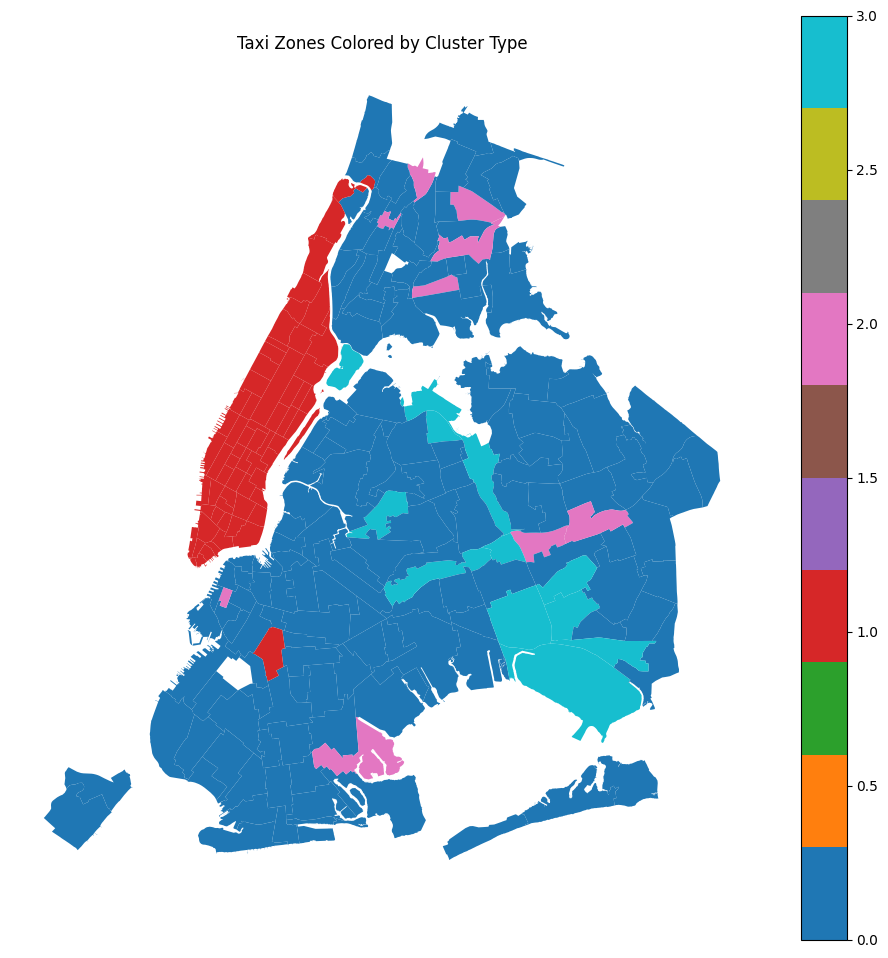

In [79]:
gdf_zones = gpd.read_file('/content/drive/MyDrive/Datasets/MIS-502/taxi_zones.shp')

# Merge clusters back
gdf_zones = gdf_zones.merge(zone_cluster_features[['Cluster']], left_on='zone', right_index=True, how='left')

# Plot
gdf_zones.plot(column='Cluster', cmap='tab10', legend=True, figsize=(12,12))
plt.title('Taxi Zones Colored by Cluster Type')
plt.axis('off')
plt.show()


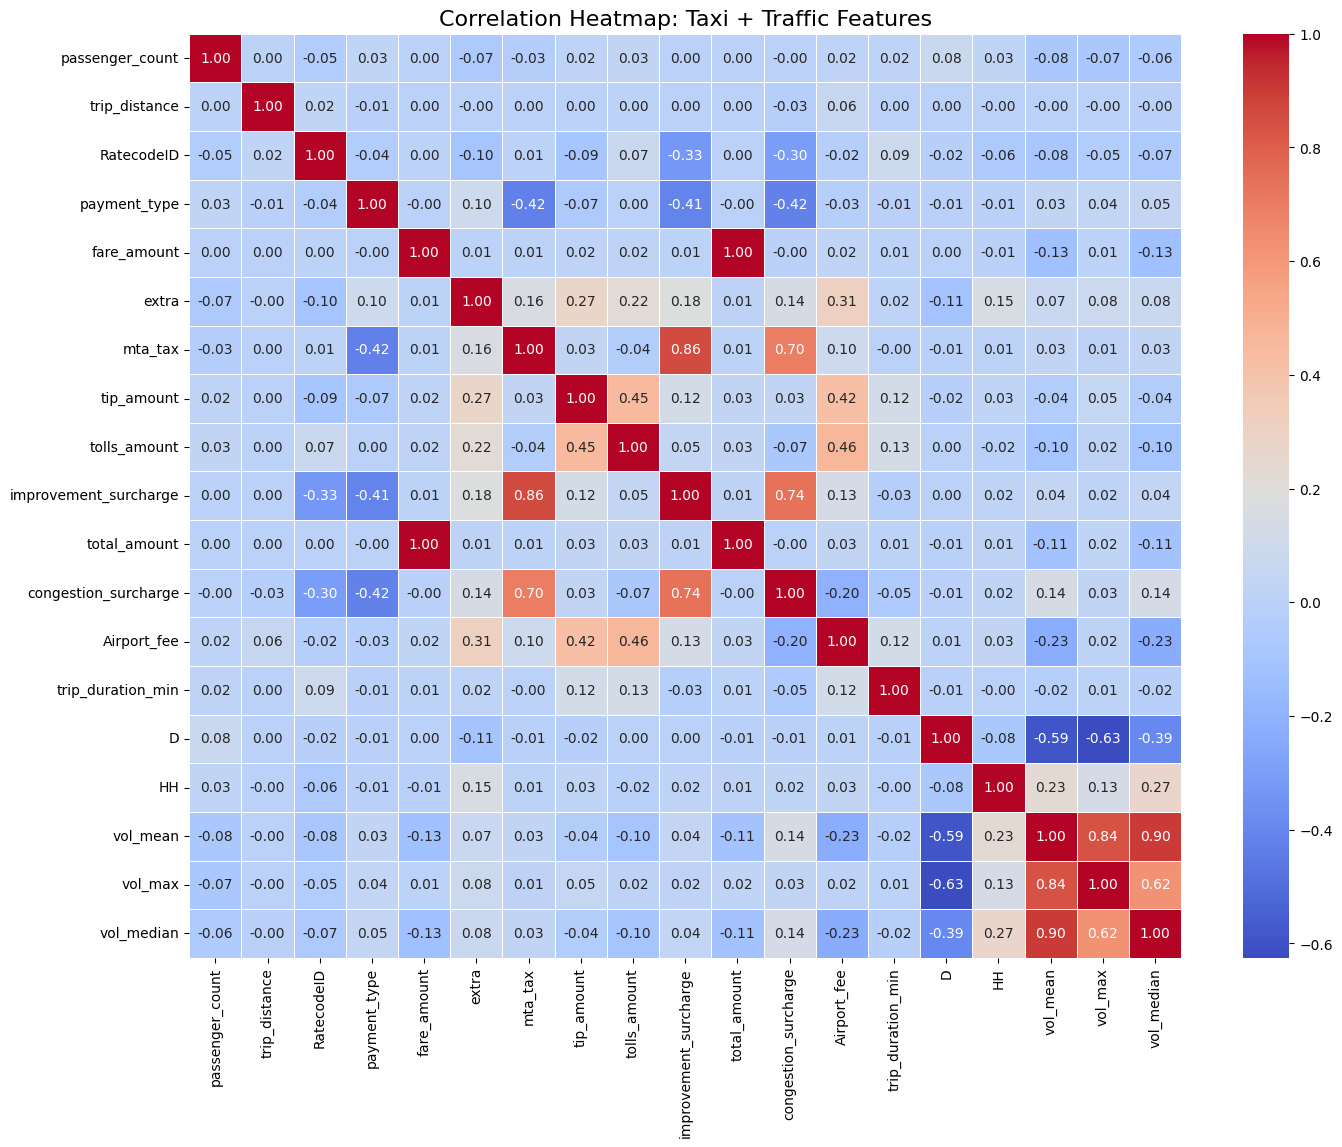

In [80]:
# Simple correlation matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df_trips_merged.select_dtypes(include=['float64', 'int64']).copy()

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Taxi + Traffic Features', fontsize=16)
plt.show()

# High correlation scatterplots
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]




In [81]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# 1. Sample and Filter
halved_data = demand_df.sample(frac=0.5, random_state=42)
popular_zones = halved_data['PUZone'].value_counts()
popular_zones = popular_zones[popular_zones > 10].index
filtered_data = halved_data[halved_data['PUZone'].isin(popular_zones)]

# 2. Chunking Setup
chunk_size = 10000
num_chunks = (len(filtered_data) // chunk_size) + 1
combined_frequent_itemsets = pd.DataFrame()
combined_rules = pd.DataFrame()

# 3. Process Chunks
for i in range(num_chunks):
    print(f"Processing chunk {i+1}/{num_chunks}...")
    chunk = filtered_data.iloc[i * chunk_size : (i+1) * chunk_size]

    transaction_data = pd.DataFrame()
    transaction_data['high_pickup'] = (chunk['pickup_count'] > chunk['pickup_count'].median()).astype(int)
    transaction_data['evening'] = chunk['pickup_hour'].between(16, 20).astype(int)
    transaction_data['weekend'] = (chunk['pickup_weekday'] >= 5).astype(int)
    transaction_data['surge'] = chunk['is_surge'].astype(int)

    frequent_itemsets = apriori(transaction_data, min_support=0.05, use_colnames=True, low_memory=True)
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

    if frequent_itemsets.empty:
        print(f"No frequent itemsets in chunk {i+1}.")
        continue

    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    combined_frequent_itemsets = pd.concat([combined_frequent_itemsets, frequent_itemsets], ignore_index=True)
    combined_rules = pd.concat([combined_rules, rules], ignore_index=True)

# 4. Final Output
print(combined_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Processing chunk 1/5...
Processing chunk 2/5...
Processing chunk 3/5...
Processing chunk 4/5...
Processing chunk 5/5...
      antecedents    consequents   support  confidence      lift
0   (high_pickup)      (weekend)  0.130300    0.275826  1.040066
1       (weekend)  (high_pickup)  0.130300    0.491327  1.040066
2   (high_pickup)      (evening)  0.113300    0.239839  1.099675
3       (evening)  (high_pickup)  0.113300    0.519486  1.099675
4   (high_pickup)        (surge)  0.077000    0.162997  1.928964
5         (surge)  (high_pickup)  0.077000    0.911243  1.928964
6       (weekend)      (evening)  0.058200    0.219457  1.006222
7       (evening)      (weekend)  0.058200    0.266850  1.006222
8   (high_pickup)      (weekend)  0.127300    0.265485  1.025038
9       (weekend)  (high_pickup)  0.127300    0.491506  1.025038
10  (high_pickup)      (evening)  0.113800    0.237331  1.096722
11      (evening)  (high_pickup)  0.113800    0.525878  1.096722
12  (high_pickup)        (surge)  0

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in wors

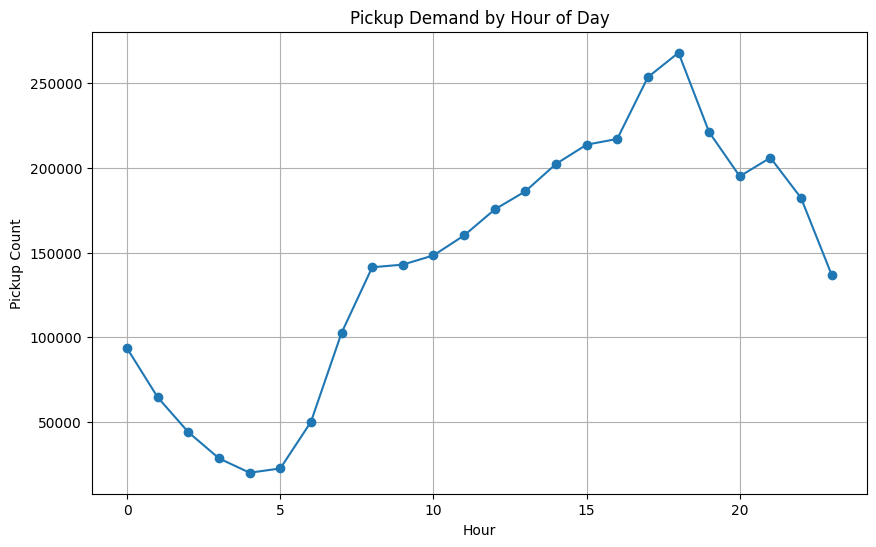

In [82]:
pickup_by_hour = df_trips.groupby('pickup_hour')['VendorID'].count()

pickup_by_hour.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Pickup Demand by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Pickup Count')
plt.grid(True)
plt.show()


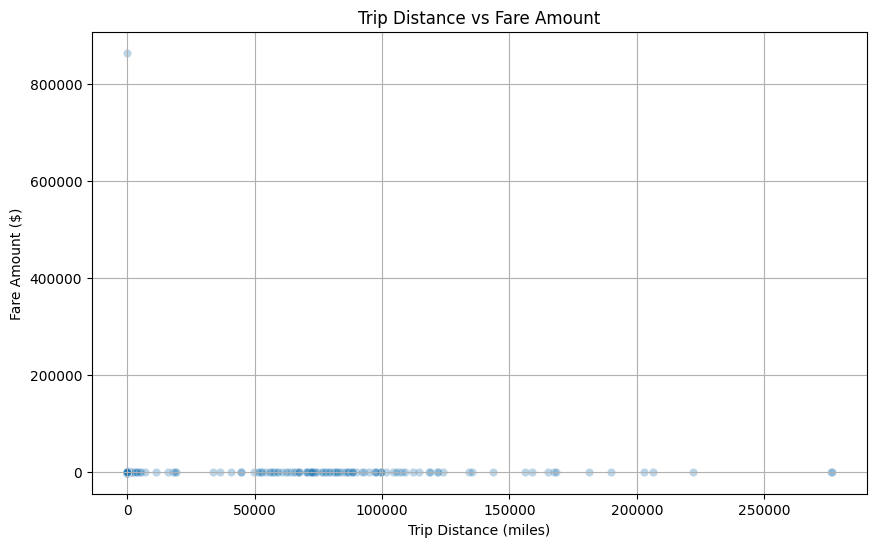

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_trips, alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


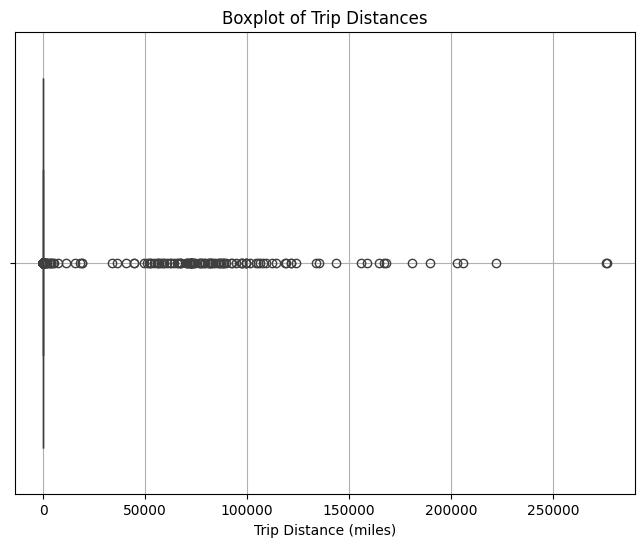

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_trips['trip_distance'])
plt.title('Boxplot of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.grid(True)
plt.show()


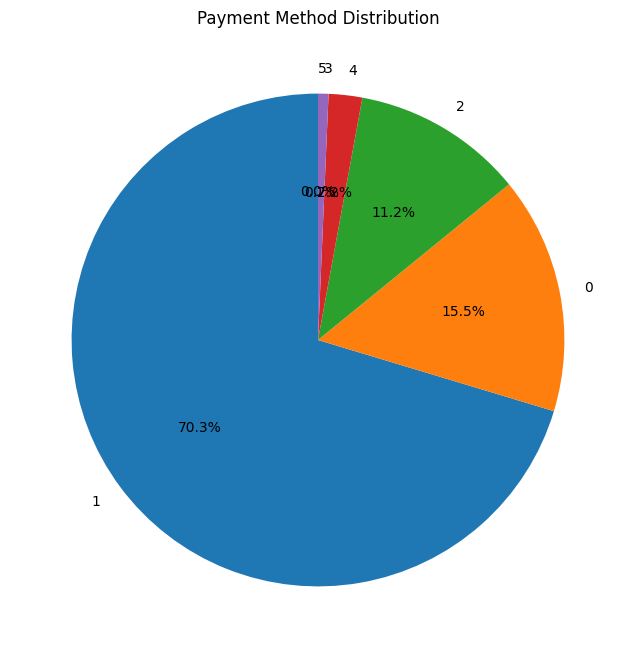

In [85]:
payment_dist = df_trips['payment_type'].value_counts()

payment_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=90)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


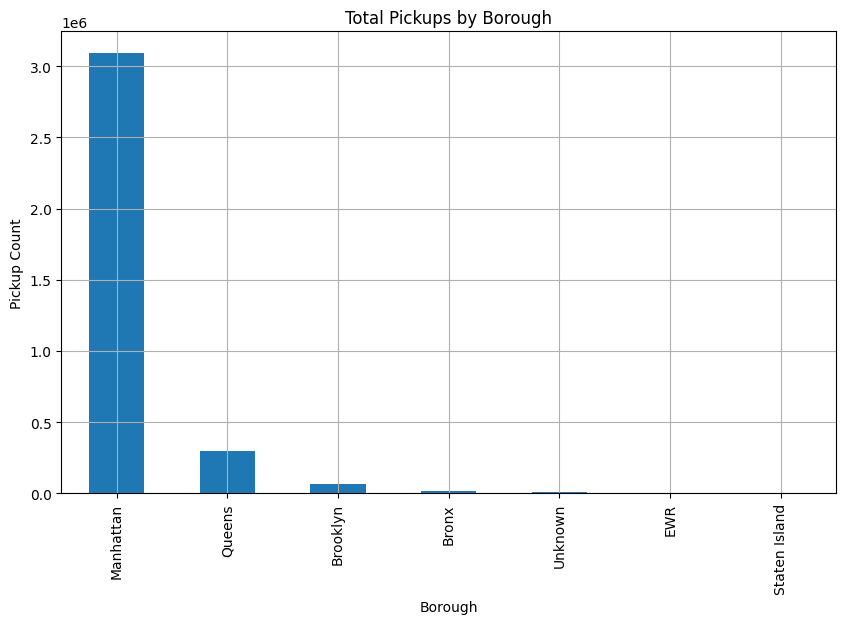

In [86]:
borough_pickups = df_trips.groupby('PUBorough')['VendorID'].count().sort_values(ascending=False)

borough_pickups.plot(kind='bar', figsize=(10,6))
plt.title('Total Pickups by Borough')
plt.ylabel('Pickup Count')
plt.xlabel('Borough')
plt.grid(True)
plt.show()


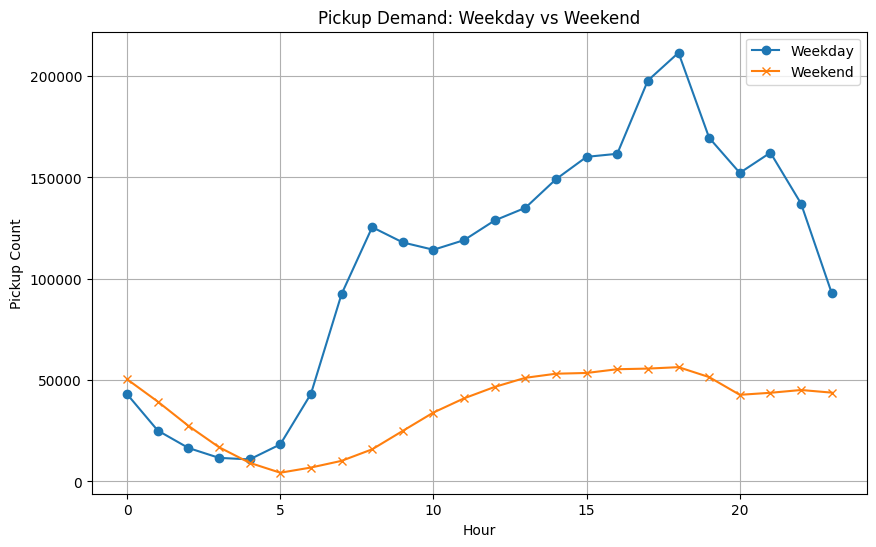

In [87]:
weekday_pickups = df_trips[df_trips['pickup_weekday'] < 5].groupby('pickup_hour')['VendorID'].count()
weekend_pickups = df_trips[df_trips['pickup_weekday'] >= 5].groupby('pickup_hour')['VendorID'].count()

plt.figure(figsize=(10,6))
plt.plot(weekday_pickups.index, weekday_pickups.values, label='Weekday', marker='o')
plt.plot(weekend_pickups.index, weekend_pickups.values, label='Weekend', marker='x')
plt.title('Pickup Demand: Weekday vs Weekend')
plt.xlabel('Hour')
plt.ylabel('Pickup Count')
plt.legend()
plt.grid(True)
plt.show()

